In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [4]:
from IPython.display import Image

In [8]:
homedir = os.getenv("HOME")
tab = ascii.read(homedir+"/github/WISE_test/testest2_plots.txt")
tab

xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsrsic_err,BA,BA_err,PA,PA_err,sky,sky_err,error,chi2nu,prefix,success_flag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64
175.3109,0.0111,174.8707,0.0189,4.8494,0.0011,17.237,0.0234,0.3845,0.0013,0.4705,0.0006,30.7007,0.0672,-5.0654,0.9446,0.0,3.4527,VFID0388-NGC6015,1
180.2237,0.0114,179.2617,0.0093,6.4258,0.0152,11.0092,0.2344,2.458,0.0328,0.9349,0.0071,-13.1859,4.4584,-62.2269,1.141,0.0,1.0938,VFID0484-NGC3945,1
168.6167,0.0087,169.1971,0.0075,6.6111,0.0087,7.4944,0.0924,1.9954,0.0186,0.8314,0.0047,87.1794,1.112,-11.8236,0.9699,0.0,1.2262,VFID0525-NGC5322,1
170.5771,0.0154,170.4544,0.012,6.5457,0.0134,9.9726,0.1871,2.016,0.0268,0.7574,0.0062,-87.4048,1.0849,-17.2861,1.2849,0.0,1.4051,VFID0547-NGC2768,1
338.7939,0.0066,337.7264,0.0143,3.394,0.0004,38.0683,0.0214,0.6033,0.0007,0.0965,0.0,-24.7751,0.004,11.9695,0.5393,1.0,2.0628,VFID0934-NGC5907,1
189.5989,0.0079,190.6553,0.0055,5.4851,0.0013,8.4349,0.0154,0.777,0.0028,0.3261,0.0005,-54.4628,0.0439,3.7732,0.918,0.0,1.7804,VFID0974-NGC5866,1
263.8745,0.0028,262.3273,0.0116,3.3039,0.0009,17.7386,0.0227,0.9567,0.003,0.2024,0.0002,-11.9891,0.0154,12.082,1.6175,0.0,4.9164,VFID0983-NGC3079,1
213.6396,0.1069,213.3482,0.059,4.943,0.0045,38.0128,0.1017,0.0915,0.002,0.5439,0.0018,68.6517,0.1861,21.7311,1.2065,0.0,1.8424,VFID1169-MESSIER109,1
197.6238,0.0193,193.3163,0.0457,4.0849,0.0016,31.1593,0.0444,0.2512,0.0011,0.4238,0.0007,12.7613,0.0632,25.1176,1.3942,0.0,2.0217,VFID1215-NGC3953,1


## An attempt to generate a corner plot featuring sersic_n, $R_e$, and magnitude:

In [3]:
import corner

In [4]:
data = np.array([tab['nsersic'],tab['re'],tab['mag']])

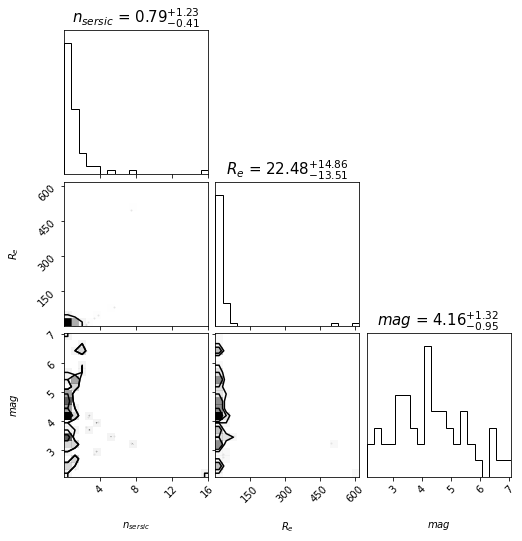

In [5]:
figure = corner.corner(data.T,labels=[r'$n_{sersic}$', r'$R_e$', r'$mag$'],show_titles=True,
                      title_kwargs={"fontsize":15})

## Finding the "outlier" galaxies that cause the contour plots to effectively line the y-axis.

In [6]:
outlier_array = np.where(data[1] > 50)
outlier_array[0]

array([17, 27, 28, 42])

In [7]:
print('Outlier R_e values:',data[1][17],data[1][27],data[1][28],data[1][42])

Outlier R_e values: 620.286 58.7082 498.1177 81.5738


In [18]:
#CAN ALSO USE THE FOLLOWING, WHICH IS MUCH LESS COMPUTATIONALLY INVOLVED:

#flag = (data[1]<50)
#data_flagged = data[flag]


flag = []

for i in range(0,len(data[1])):

    if data[1][i] > 50:
        flag.append(False)  
        print(tab['prefix'][i])
    else:
        flag.append(True)
            
print(flag)

VFID1754-NGC4051
VFID3253-NGC4565
VFID3307-NGC4725
VFID4909-MESSIER058
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [27]:
#generating a new corner plot that excludes the R_e outliers

data2 = np.array([tab['nsersic'][flag],tab['re'][flag],tab['mag'][flag]])

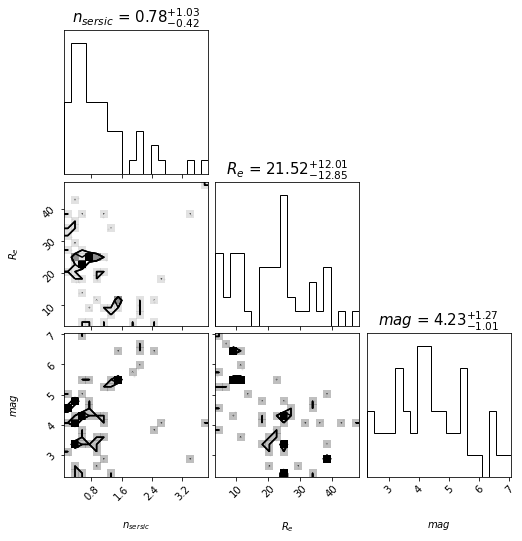

In [28]:
#note: the flag will apply to n_sersic and mag, in addition to R_e. Especially noticeable below is that
#the outlier galfit profiles in R_e appear to represent a few of those for the other variables

figure = corner.corner(data2.T,labels=[r'$n_{sersic}$', r'$R_e$', r'$mag$'],show_titles=True,
                      title_kwargs={"fontsize":15})

Bottom leftmost plot --> many galaxies of this 55 gal sample present with a small (n~1) Sersic index, signaling a smoother light disk distribution (as opposed to peaky, meaning more concentrated at the center) and perhaps hinting at these galaxies largely being gargantuan (since many occupy the low-magnitude section of the plot) spiral disks.

R_e vs. n_sersic --> there is potentially a negative correlation trend here between the effective radius and the sersic index, which Trujillo et al. 2001 investigate: "If this correlation is physical, it means that the light distribution in elliptical galaxies varies with galaxy size: larger galaxies tend to be more centrally concentrated than smaller galaxies (n can be thought of as a central concentration parameter...)." 

-----firstly, the sample size is small, so this distribution may be more a consequence of statistical noise than a de facto relationship

-----Trujillo+2001 describes the correlation for elliptical galaxies --> will such apply to spiral galaxies as well? (I.E., is there a correlation between galaxy size and light concentration?)

Text(0.5, 0, 'log(R_e)')

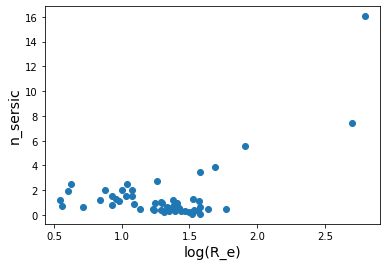

In [20]:
# Indeed, ours is currently (with no outlier removal):

plt.scatter(np.log10(tab['re']),tab['nsersic'])
#plt.ylim(0,8)
plt.ylabel('n_sersic',fontsize=14)
plt.xlabel('log(R_e)',fontsize=14)

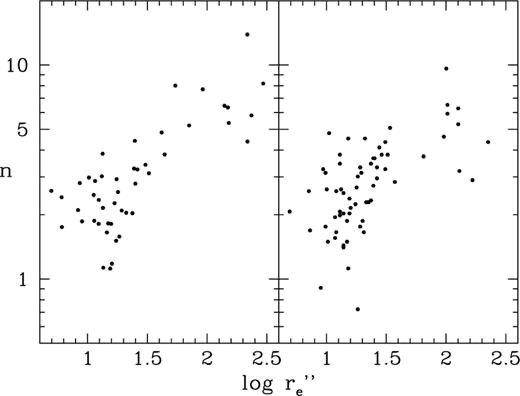

In [11]:
# whereas theirs is the more pristine:

Image("/Users/k215c316/Unknown.png")

-----------------------

## Below are the four "outlier" galaxies identified above, for reference purposes.

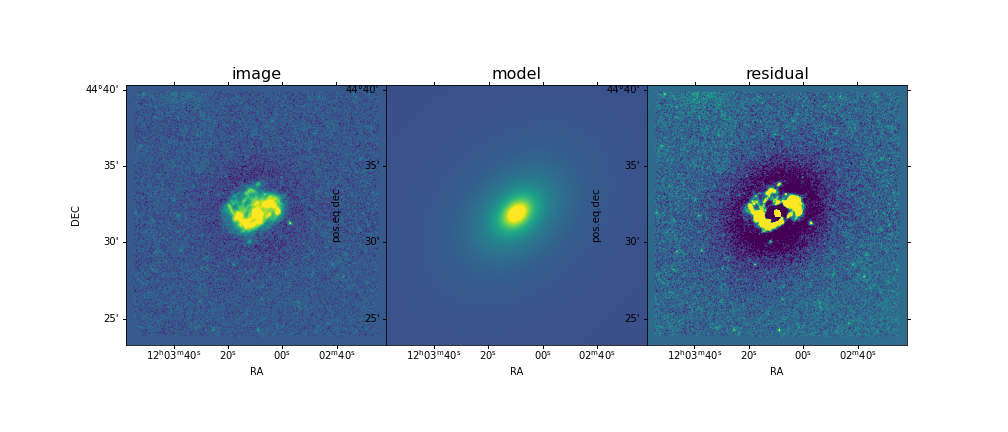

In [12]:
# VFID1754-NGC4051  (R_e = 620.286)

Image("/Users/k215c316/1.png")

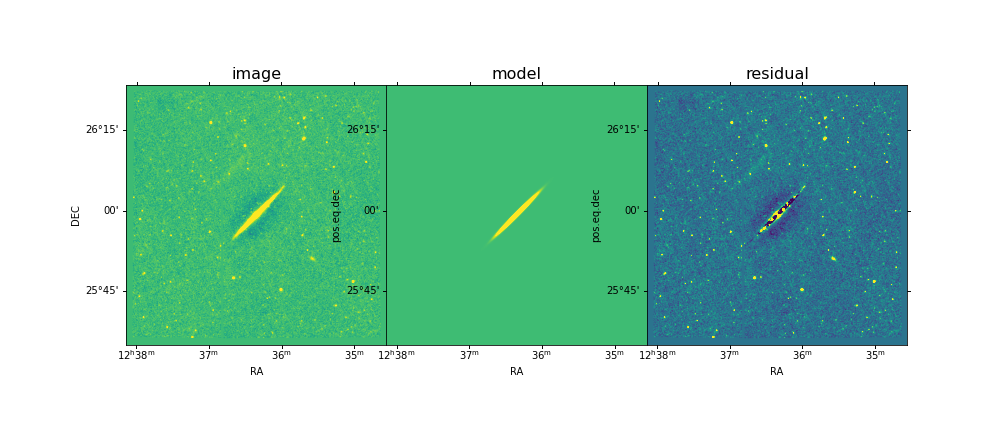

In [13]:
# VFID3253-NGC4565   (R_e = 58.708)

Image("/Users/k215c316/2.png")

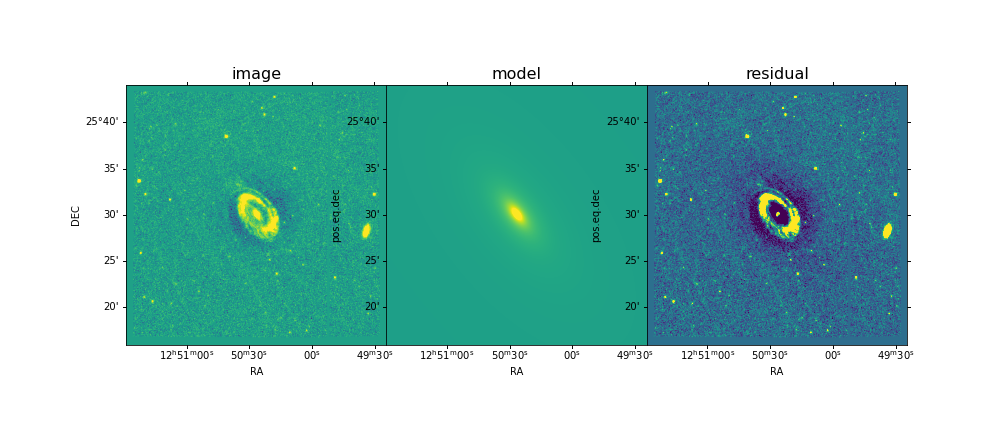

In [14]:
# VFID3307-NGC4725   (R_e = 498.1177)

Image("/Users/k215c316/3.png")

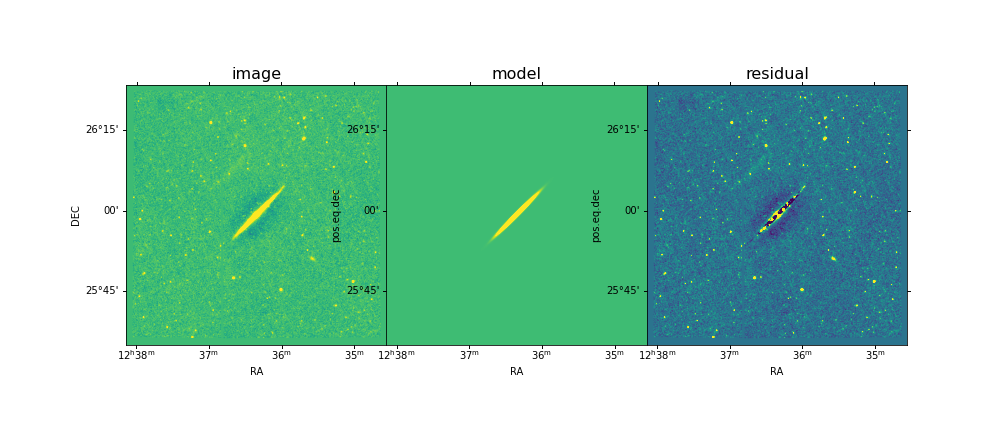

In [15]:
# VFID4909-MESSIER058   (R_e = 81.5738)

Image("/Users/k215c316/2.png")

-----------------------

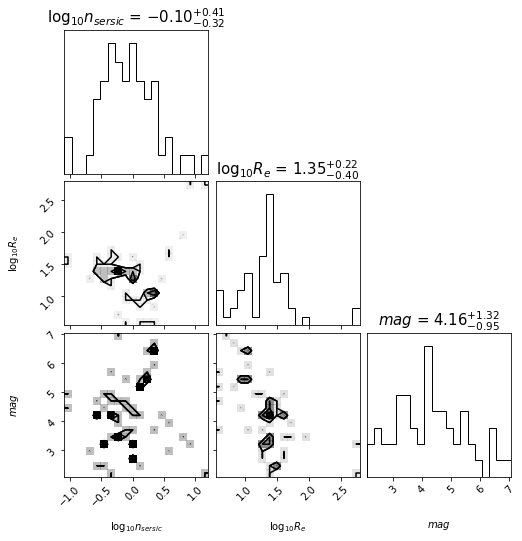

In [34]:
#A second option is to not apply the flag and instead use log10(R_e), per Greg's suggestion...
#I went ahead and did likewise for n_sersic, though I am unsure whether I have committed a contemptible act.

data3 = np.array([np.log10(tab['nsersic']),np.log10(tab['re']),tab['mag']])
figure = corner.corner(data3.T,labels=[r'$\log_{10}{n_{sersic}}$', r'$\log_{10}{R_e}$', r'$mag$'],
                       show_titles=True, title_kwargs={"fontsize":15})

In [125]:
xs.T

array([[ 3.845000e-01,  1.723700e+01,  4.849400e+00],
       [ 2.458000e+00,  1.100920e+01,  6.425800e+00],
       [ 1.995400e+00,  7.494400e+00,  6.611100e+00],
       [ 2.016000e+00,  9.972600e+00,  6.545700e+00],
       [ 6.033000e-01,  3.806830e+01,  3.394000e+00],
       [ 7.770000e-01,  8.434900e+00,  5.485100e+00],
       [ 9.567000e-01,  1.773860e+01,  3.303900e+00],
       [ 9.150000e-02,  3.801280e+01,  4.943000e+00],
       [ 2.512000e-01,  3.115930e+01,  4.084900e+00],
       [ 2.976000e-01,  3.673710e+01,  4.129500e+00],
       [ 3.865000e-01,  1.950090e+01,  3.315200e+00],
       [ 5.432000e-01,  2.237030e+01,  3.487700e+00],
       [ 3.117000e-01,  2.248200e+01,  4.325300e+00],
       [ 1.176000e+00,  2.399090e+01,  4.132600e+00],
       [ 6.279000e-01,  2.151980e+01,  3.856200e+00],
       [ 2.689000e-01,  2.723670e+01,  4.628200e+00],
       [ 3.879600e+00,  4.847550e+01,  3.987800e+00],
       [ 1.605260e+01,  6.202860e+02,  2.094500e+00],
       [ 4.710000e-01,  1.70